In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import math
import random
from scipy.stats import norm
import scipy
import sys
import graph as gr

In [2]:
sys.setrecursionlimit(10000)

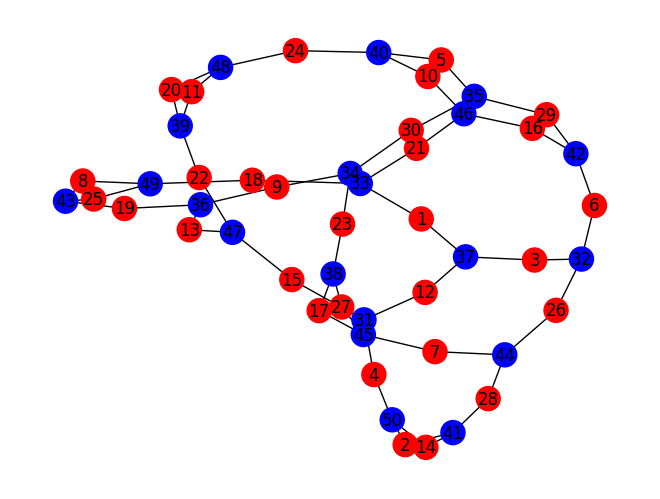

In [3]:
# generate a rsrbg graph with fallowing parameters
n = 50   # number of nodes
d1 = 2
d2 = 3

rsrbg_graph, color_map = gr.RSRBG(n, d1, d2)
nx.draw(rsrbg_graph,node_color = color_map,  with_labels=True)
plt.show()

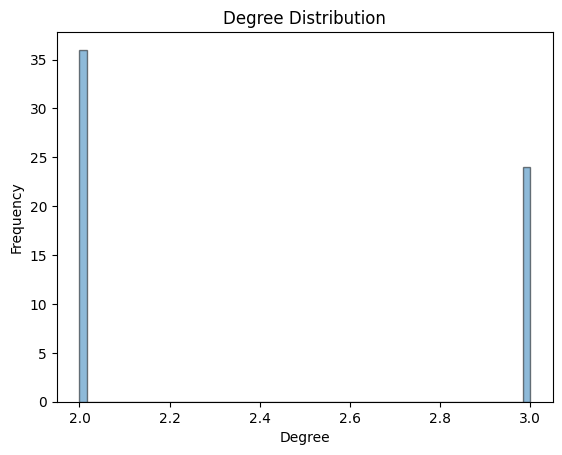

In [7]:
# degree distribution for rsrbg graph
gr.draw_degree_distribution(rsrbg_graph)

In [8]:
# draw eigen value distribution
# draw_eigen_values_distribution(rsrbg_graph)

In [9]:
# generate 100 RSRBG graph
number_of_simulation = 100
d_random_range = 20
multiplier = 20  # ضریب جمع درجات

rsrbg_graphs = [] # dataset
for _ in range(0, number_of_simulation):
    d1 = random.randint(1,d_random_range)
    d2 = random.randint(1,d_random_range)
    n = ((d1 + d2) * random.randint(1, multiplier))
    print(f"from logger: creating {_+1} th node with (d1: {d1}, d2: {d2}, n: {n})")
    rsrbg_graph, color_map = RSRBG(n, d1, d2)
    rsrbg_graphs.append({
      "n": n,
      "d1": d1,
      "d2": d2,
      "node_color": color_map,
      "graph": rsrbg_graph
    })
    # draw_eigen_values_distribution(rsrbg_graph)

from logger: creating 1 th node with (d1: 19, d2: 10, n: 522)
from logger: creating 2 th node with (d1: 2, d2: 14, n: 208)
from logger: creating 3 th node with (d1: 13, d2: 4, n: 85)
from logger: creating 4 th node with (d1: 5, d2: 15, n: 140)
from logger: creating 5 th node with (d1: 18, d2: 13, n: 124)
from logger: creating 6 th node with (d1: 4, d2: 14, n: 18)
from logger: creating 7 th node with (d1: 2, d2: 1, n: 60)
from logger: creating 8 th node with (d1: 15, d2: 7, n: 286)
from logger: creating 9 th node with (d1: 4, d2: 4, n: 120)
from logger: creating 10 th node with (d1: 20, d2: 11, n: 62)
from logger: creating 11 th node with (d1: 14, d2: 3, n: 306)
from logger: creating 12 th node with (d1: 12, d2: 16, n: 392)
from logger: creating 13 th node with (d1: 13, d2: 19, n: 96)
from logger: creating 14 th node with (d1: 20, d2: 2, n: 396)
from logger: creating 15 th node with (d1: 17, d2: 13, n: 180)
from logger: creating 16 th node with (d1: 2, d2: 18, n: 300)
from logger: creat

(n: 522, d1: 19, d2: 10)


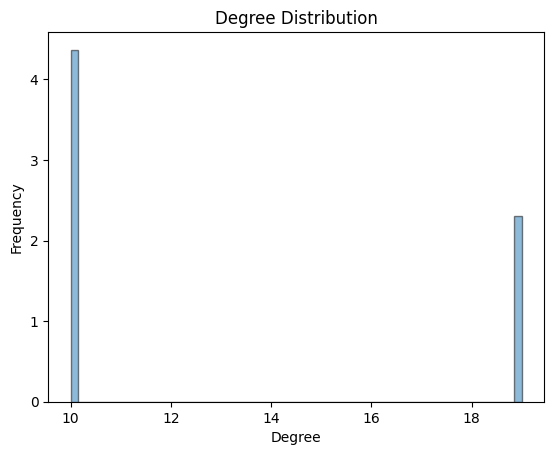


---------------------------

(n: 208, d1: 2, d2: 14)


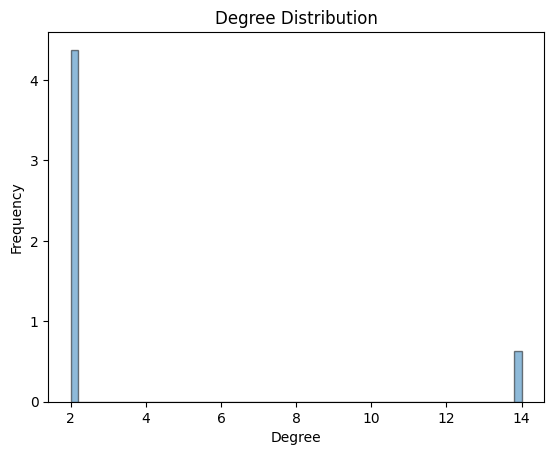


---------------------------

(n: 85, d1: 13, d2: 4)


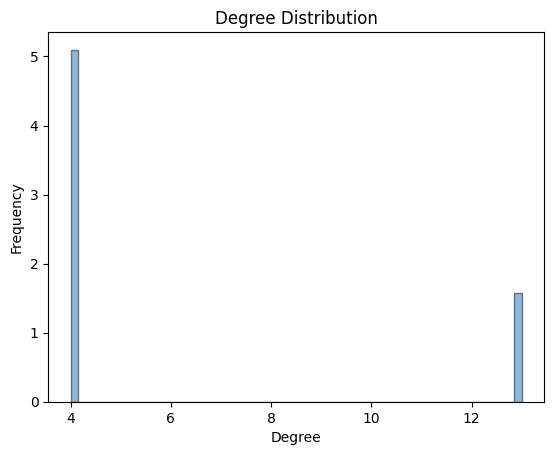


---------------------------

(n: 140, d1: 5, d2: 15)


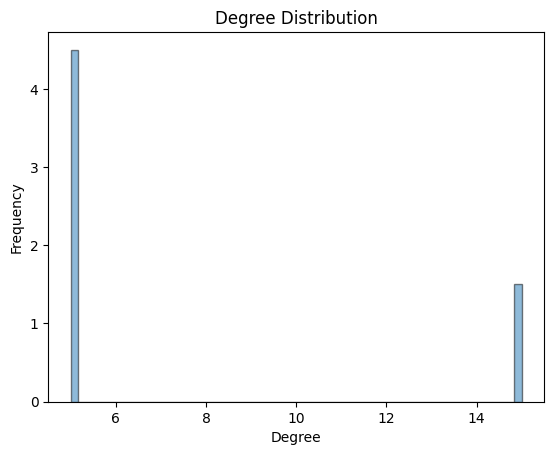


---------------------------

(n: 124, d1: 18, d2: 13)


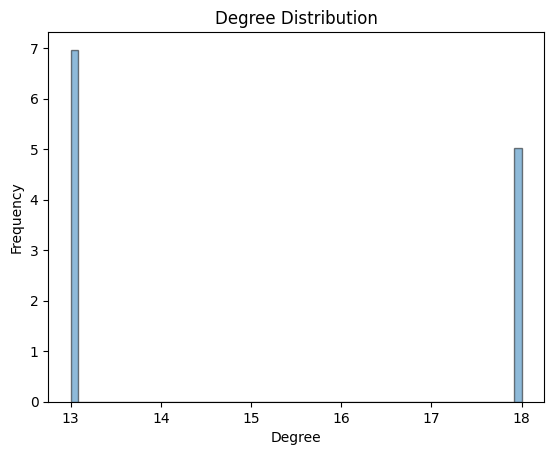


---------------------------



In [11]:
# check some sample
number_of_sample = 5

for i in range(number_of_sample):
    rsrbg = rsrbg_graphs[i]
    print(f"(n: {rsrbg['n']}, d1: {rsrbg['d1']}, d2: {rsrbg['d2']})")
    gr.draw_degree_distribution(rsrbg['graph'])
    # draw_eigen_values_distribution(rsrbg['graph'])
    print("\n---------------------------\n")

# Calculate Spectral Gap

In [13]:
sum_spectral_gaps = 0
for rsrbg in rsrbg_graphs:
    rsrbg = rsrbg['graph']
    sum_spectral_gaps += gr.spectral_gap(rsrbg)
average = sum_spectral_gaps / len(rsrbg_graphs)
print(f"average spectral gap is {average}")

average spectral gap is (3.875992903443999+0j)


# Calculate Algebratic Connectivity


In [15]:
ac_sum = 0
for rsrbg in rsrbg_graphs:
    rsrbg = rsrbg['graph']
    ac_sum += gr.algebraic_connectivity(rsrbg)
avarage = ac_sum / len(rsrbg_graphs)
print(f"average algebratic connectivity is {avarage}")

average algebratic connectivity is 3.486770140325


# Calculate Natural Connectitvity


In [16]:
nc_sum = 0
for rsrbg in rsrbg_graphs:
    rsrbg = rsrbg['graph']
    nc_sum += gr.natural_connectivity(rsrbg)
average = nc_sum / len(rsrbg_graphs)
print(f"average natural connectivity is {average}")

E:\Simulation_Final_Project\graph.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
  eig_sum += math.exp(eig) / n


average natural connectivity is 4.6801335326730005


# Calculate Symmetry Ratio

In [17]:
# نسبت تقارن برای گراف های غیر همبند چگونه است؟؟
symmetry_sum = 0
for rsrbg in rsrbg_graphs:
    rsrbg = rsrbg['graph']
    symmetry_sum += gr.symmetry_ratio(rsrbg)
average = symmetry_sum / len(rsrbg_graphs)
print(f"average symmetry ratio is {average}")

average symmetry ratio is 37.50092857142857


# Calculate Energy

In [19]:
energy_sum = 0
for rsrbg in rsrbg_graphs:
    rsrbg = rsrbg['graph']
    energy_sum += gr.energy(rsrbg)
average = energy_sum / len(rsrbg_graphs)
print(f"average energy is {average}")

average energy is 508.1291276432969


# Calculate Laplacian Energy


In [20]:
lap_energy_sum = 0
for rsrbg in rsrbg_graphs:
    rsrbg = rsrbg['graph']
    lap_energy_sum += gr.laplacian_energy(rsrbg)
average = lap_energy_sum / len(rsrbg_graphs)
print(f"average laplacian energy is {average}")


average laplacian energy is 883.6987186248701
